## Install the needed libraries

In [1]:
# !pip install --upgrade pip
# !pip install --upgrade setuptools
# !apt-get install -y python3-dev
# !pip install scikit-learn
# !pip3 install pyproject.toml-based

In [2]:
!pip3 install ktrain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 58.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 55.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 64.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 33.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for ktrain: filename=ktrain-0.39.0-py3-none-any.whl size=25319737 sha256=14b24e90f9ddf54cc0929081857de9f9032bb746112032e0445793a6c9339fda
  Stored in directory: /root/.cache/pip/wheels/98/fd/0a/ef6252223f3d2

### Import the needed libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ktrain
from ktrain import text
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Function to compute the metrics

In [5]:
def compute_classification_report(true_labels_column, predicted_labels_column):
    report = classification_report(true_labels_column, predicted_labels_column)
    accuracy = accuracy_score(true_labels_column, predicted_labels_column)
    precision = precision_score(true_labels_column, predicted_labels_column, average='macro')
    recall = recall_score(true_labels_column, predicted_labels_column, average='macro')
    f1 = f1_score(true_labels_column, predicted_labels_column, average='macro')

    print("Classification Report:")
    print(report)
    print("Accuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1)

    return accuracy, precision, recall, f1

# Function to plot the metrics

In [6]:
def plot_metrics(labels, accuracy_values):

    accuracy_values_scaled = [value * 100 for value in accuracy_values]

    # Create a counter plot
    fig, ax = plt.subplots()
    bar_width = 0.2  # Smaller width
    index = np.arange(len(labels))

    bars = ax.bar(index, accuracy_values_scaled, bar_width)

    # Add values on top of the bars
    for bar, value in zip(bars, accuracy_values):
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01,
                f'{value:.2f}%', ha='center', va='bottom')

    ax.set_xlabel('Datasets')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('BERT Accuracy Comparison')
    ax.set_xticks(index)
    ax.set_xticklabels(labels)
    ax.legend()

    plt.show()

# BERT for 6 topics

## Read data

In [7]:
train = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/news_data%206%20categories/train.csv")
test = pd.read_csv("https://github.com/AnasElbattra/News-Understanding-NLP/raw/main/TOPICS/DATA/news_data%206%20categories/test.csv")

In [8]:
train

,Title,Excerpt,Category
0,"Uefa Opens Proceedings against Barcelona, Juve...",Uefa has opened disciplinary proceedings again...,sports
1,Amazon Blames Inflation as It Increases Cost o...,The increases are steeper than the 17 percent ...,business
2,Nigeria’s Parliament Passes Amended Electoral ...,Nigeria's Senate on Tuesday passed the harmoni...,politics
3,Nigeria: Lagos Governor Tests Positive for Cov...,"The Lagos State Governor, Mr. Babajide Sanwo-O...",health
4,South Africa Calls For Calm as Electoral Refor...,South Africa has raised concerns about the det...,politics
...,...,...,...
4681,Uganda Drops Charges Against Nigerian Singers ...,Nigerian singers Omah Lay and Tems are set to ...,entertainment
4682,NNPC Cuts Directors’ Fees by 60.2%,The Nigerian National Petroleum Corporation (N...,business
4683,Nigeria’s External Reserves Hit $37bn with $3....,Nigeria’s foreign reserves will get a timely b...,business
4684,Transcorp Hilton Wins Africa’s Leading Busines...,Transcorp Hilton Abuja has been honoured with ...,business


In [9]:
train.Category.value_counts()

business         1268
sports           1124
politics         1073
health            550
entertainment     382
tech              289
Name: Category, dtype: int64

In [10]:
X = train.Excerpt
Y = train.Category

## Split the data

In [11]:
X_train, X_temp, y_train, y_temp = train_test_split(X,Y , shuffle=True, test_size = 0.5, random_state = 12342 , stratify=Y)

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, shuffle=True, test_size = 0.5, random_state = 12342 , stratify=y_temp)


In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)

(2343,)
(2343,)
(1171,)
(1171,)
(1172,)
(1172,)


In [13]:
x_train = X_train.values
x_val = X_val.values
y_train = y_train.values
y_val = y_val.values
x_test = X_test.values
y_test = y_test.values

## Text preprocessing

In [14]:
(x_train_bert,  y_train_bert), (x_val_bert, y_val_bert), preproc = text.texts_from_array(x_train=x_train, y_train=y_train,
                                                                                         x_test = x_val, y_test=y_val,
                                                                                          preprocess_mode='bert',
                                                                                          lang = 'en',
                                                                                          maxlen = 512,
                                                                                          max_features=36000)

downloading pretrained BERT model (uncased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: en


Is Multi-Label? False
preprocessing test...
language: en


task: text classification


## Download the model

In [15]:
model = text.text_classifier('bert', train_data=(x_train_bert, y_train_bert), preproc=preproc)
learner_1 = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=6)
learner_2 = ktrain.get_learner(model, train_data=(x_train_bert, y_train_bert), val_data=(x_val_bert, y_val_bert), batch_size=6)

Is Multi-Label? False
maxlen is 512


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


## Using the cyclical learning rate policy

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/4
391/391 [==============================] - 97s 189ms/step - loss: 1.7100 - accuracy: 0.3299
Epoch 2/4
391/391 [==============================] - 74s 189ms/step - loss: 0.9676 - accuracy: 0.6714
Epoch 3/4
391/391 [==============================] - 29s 73ms/step - loss: 2.3795 - accuracy: 0.2130


done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 3.94E-06
	Min numerical gradient (purple): 6.86E-06
	Min loss divided by 10 (omitted from plot): 1.63E-05


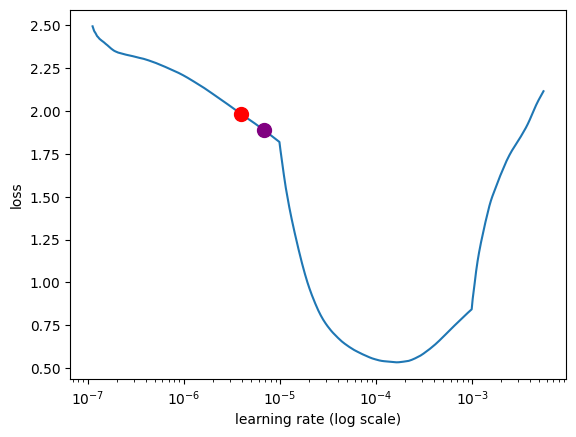

In [16]:
learner_1.lr_find(show_plot=True, max_epochs=4, suggest= True)             # briefly simulate training to find good learning rate


In [17]:
learner_1.fit_onecycle(6.86E-06, 5)



begin training using onecycle policy with max lr of 6.86e-06...
Epoch 1/5
391/391 [==============================] - 109s 231ms/step - loss: 1.4056 - accuracy: 0.5070 - val_loss: 0.7966 - val_accuracy: 0.8096
Epoch 2/5
391/391 [==============================] - 86s 220ms/step - loss: 0.5273 - accuracy: 0.8553 - val_loss: 0.4069 - val_accuracy: 0.8753
Epoch 3/5
391/391 [==============================] - 86s 220ms/step - loss: 0.3146 - accuracy: 0.9023 - val_loss: 0.4227 - val_accuracy: 0.8770
Epoch 4/5
391/391 [==============================] - 86s 220ms/step - loss: 0.2080 - accuracy: 0.9351 - val_loss: 0.3915 - val_accuracy: 0.8813
Epoch 5/5
391/391 [==============================] - 86s 220ms/step - loss: 0.1520 - accuracy: 0.9518 - val_loss: 0.4000 - val_accuracy: 0.8822


In [18]:
learner_1.validate(val_data=(x_val_bert, y_val_bert), class_names=["business", "sports", "politics" , "health", "entertainment", "tech"])

37/37 [==============================] - 15s 282ms/step
               precision    recall  f1-score   support

     business       0.84      0.85      0.84       317
       sports       0.88      0.88      0.88        96
     politics       0.89      0.85      0.87       137
       health       0.91      0.93      0.92       268
entertainment       0.97      0.98      0.98       281
         tech       0.60      0.54      0.57        72

     accuracy                           0.88      1171
    macro avg       0.85      0.84      0.84      1171
 weighted avg       0.88      0.88      0.88      1171



array([[269,   5,   6,  14,   2,  21],
       [  6,  84,   1,   1,   2,   2],
       [ 13,   1, 117,   4,   1,   1],
       [  7,   3,   5, 249,   3,   1],
       [  1,   2,   1,   1, 275,   1],
       [ 26,   0,   1,   6,   0,  39]])

## Using the triangular learning rate policy

simulating training for different learning rates... this may take a few moments...


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/4
391/391 [==============================] - 74s 188ms/step - loss: 1.6852 - accuracy: 0.3325
Epoch 2/4
391/391 [==============================] - 74s 189ms/step - loss: 1.1446 - accuracy: 0.5617
Epoch 3/4
391/391 [==============================] - 31s 80ms/step - loss: 2.3474 - accuracy: 0.2048


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(




done.
Visually inspect loss plot and select learning rate associated with falling loss
Three possible suggestions for LR from plot:
	Longest valley (red): 5.55E-06
	Min numerical gradient (purple): 7.11E-06
	Min loss divided by 10 (omitted from plot): 1.12E-05


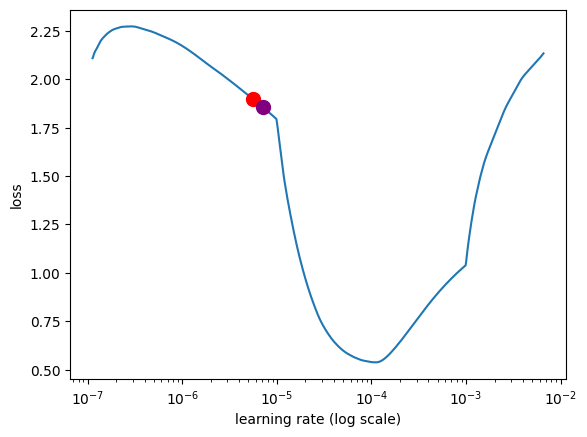

In [19]:
learner_2.lr_find(show_plot=True, max_epochs=4, suggest= True)             # briefly simulate training to find good learning rate

In [20]:
learner_2.autofit(6.94E-06)

early_stopping automatically enabled at patience=5
reduce_on_plateau automatically enabled at patience=2


begin training using triangular learning rate policy with max lr of 6.94e-06...
Epoch 1/1024
391/391 [==============================] - 102s 232ms/step - loss: 1.0349 - accuracy: 0.6411 - val_loss: 0.4832 - val_accuracy: 0.8693
Epoch 2/1024
391/391 [==============================] - 86s 220ms/step - loss: 0.3907 - accuracy: 0.8869 - val_loss: 0.3969 - val_accuracy: 0.8856
Epoch 3/1024
391/391 [==============================] - 86s 220ms/step - loss: 0.2826 - accuracy: 0.9138 - val_loss: 0.3930 - val_accuracy: 0.8839
Epoch 4/1024
391/391 [==============================] - 86s 220ms/step - loss: 0.2175 - accuracy: 0.9360 - val_loss: 0.4021 - val_accuracy: 0.8856
Epoch 5/1024
391/391 [==============================] - ETA: 0s - loss: 0.1749 - accuracy: 0.9479
Epoch 00005: Reducing Max LR on Plateau: new max lr will be 3.47e-06 (if not early_stopping).
391/391 [=======================

In [21]:
learner_2.validate(val_data=(x_val_bert, y_val_bert), class_names=["business", "sports", "politics" , "health", "entertainment", "tech"])

37/37 [==============================] - 15s 282ms/step
               precision    recall  f1-score   support

     business       0.86      0.83      0.84       317
       sports       0.91      0.88      0.89        96
     politics       0.87      0.85      0.86       137
       health       0.90      0.93      0.91       268
entertainment       0.97      0.98      0.97       281
         tech       0.61      0.64      0.63        72

     accuracy                           0.88      1171
    macro avg       0.85      0.85      0.85      1171
 weighted avg       0.88      0.88      0.88      1171



array([[263,   4,  10,  14,   2,  24],
       [  3,  84,   1,   3,   2,   3],
       [ 12,   1, 117,   5,   1,   1],
       [  7,   1,   5, 250,   4,   1],
       [  1,   2,   1,   2, 275,   0],
       [ 20,   0,   1,   5,   0,  46]])

In [22]:
# getting predictor variable
predictor_1 = ktrain.get_predictor(learner_1.model, preproc)
predictor_2 = ktrain.get_predictor(learner_2.model, preproc)

In [23]:
y_pred_1 = predictor_1.predict(x_test.tolist())
y_pred_2 = predictor_2.predict(x_test.tolist())


## Compute the metrics for testing set

In [24]:
accuracy_6_1, precision_6_1, recall_6_1, f1_6_1 = compute_classification_report(y_test , y_pred_1)

Classification Report:
               precision    recall  f1-score   support

     business       0.81      0.87      0.84       317
entertainment       0.88      0.88      0.88        95
       health       0.89      0.85      0.87       138
     politics       0.93      0.88      0.90       269
       sports       0.98      0.98      0.98       281
         tech       0.56      0.50      0.53        72

     accuracy                           0.88      1172
    macro avg       0.84      0.83      0.83      1172
 weighted avg       0.88      0.88      0.87      1172

Accuracy: 0.8754266211604096
Precision: 0.8410386437216211
Recall: 0.8276168300427375
F1 Score: 0.8336111258453393


In [25]:
accuracy_6_2, precision_6_2, recall_6_2, f1_6_2 = compute_classification_report(y_test , y_pred_2)

Classification Report:
               precision    recall  f1-score   support

     business       0.84      0.86      0.85       317
entertainment       0.86      0.89      0.88        95
       health       0.88      0.86      0.87       138
     politics       0.93      0.88      0.90       269
       sports       0.97      0.98      0.97       281
         tech       0.55      0.60      0.57        72

     accuracy                           0.88      1172
    macro avg       0.84      0.84      0.84      1172
 weighted avg       0.88      0.88      0.88      1172

Accuracy: 0.878839590443686
Precision: 0.8384385628569936
Recall: 0.8447419881849817
F1 Score: 0.8412504173189507


## Save the models

In [26]:
predictor_1.save('/content/drive/MyDrive/Topics/BERT/bert_6_topics_1')
predictor_2.save('/content/drive/MyDrive/Topics/BERT/bert_6_topics_2')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
